In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credit_card_data = pd.read_csv("creditcard.csv")

# Exploratory Data Analysis (EDA)

In [3]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
credit_card_data.shape

(284807, 31)

The dataset has 284807 records with 31 columns each (30 features + the binary classification class [fraud/not-fraud])

**Time:** Number of seconds elapsed between this transaction and the first transaction in the dataset

**V1-V28:** Anonymous features obtained through PCA transformation for confidentiality purposes

**Amount:** Transaction amount

**Class:** Binary variable indicating whether the transaction is fraudulent (1) or non-fraudulent (0)

In [7]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no missing values in the dataset.

## Data cleaning

In [ ]:
credit_card_data.drop_duplicates()

In [9]:
credit_card_data.shape

(284807, 31)

The size of the dataset remains the same, hence there are no duplicates.

In [11]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


All the features have reasonable values, hence no further cleaning is needed.

## Data visualization

Legit transactions (0):  284315
Fraudolent transactions (1):  492


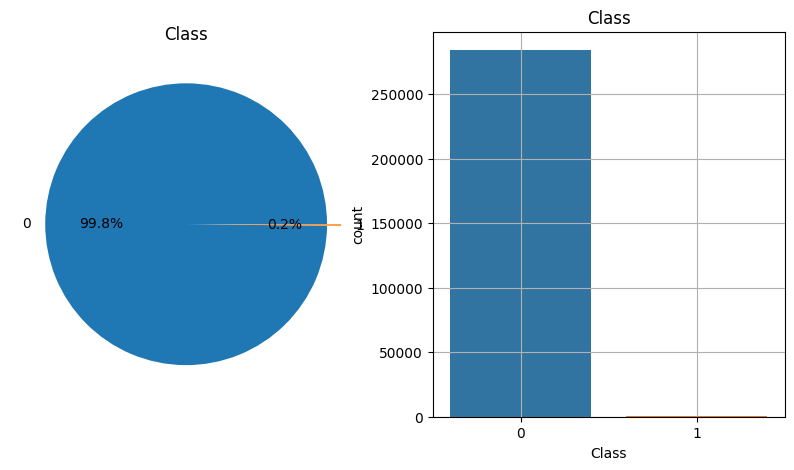

In [14]:
f, ax = plt.subplots(1,2,figsize=(10,5))

credit_card_data['Class'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Class')
ax[0].set_ylabel('')

sns.countplot(x = credit_card_data['Class'], ax = ax[1])
ax[1].set_title('Class')

N,P = credit_card_data['Class'].value_counts()
print('Legit transactions (0): ', N)
print('Fraudolent transactions (1): ', P)

plt.grid()
plt.show()

Out of 284315 transactions, only 492 are fraudolent. Hence the dataset is **extremely imbalanced**. 
To deal with this problem, I'll try to apply an oversampling technique called SMOTE (Synthetic Minority Over-sampling Technique). SMOTE is a popular oversampling technique that generates synthetic examples of the minority class by interpolating between existing minority class examples. The algorithm works by selecting an example from the minority class and finding its k-nearest neighbors. It then creates new synthetic examples by interpolating between the selected example and its k-nearest neighbors.

### Oversampling

In [15]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [16]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [19]:
target_variable = 'Class'

X = credit_card_data.drop(target_variable, axis = 1) #input features
y = credit_card_data[target_variable] #target feature

In [20]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
smote = SMOTE(random_state=42)

In [22]:
# apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [56]:
print("Before oversampling, the dataset has " + str(X.shape[0]) + " rows")

Before oversampling, the dataset has 284807 rows


In [57]:
print("After oversampling, the dataset has " + str(X_resampled.shape[0]) + " rows")

After oversampling, the dataset has 568630 rows


Let's see the new distribution for the target class.

In [28]:
print(y_resampled.value_counts())

0    284315
1    284315
Name: Class, dtype: int64


Legit transactions (0):  284315
Fraudolent transactions (1):  284315


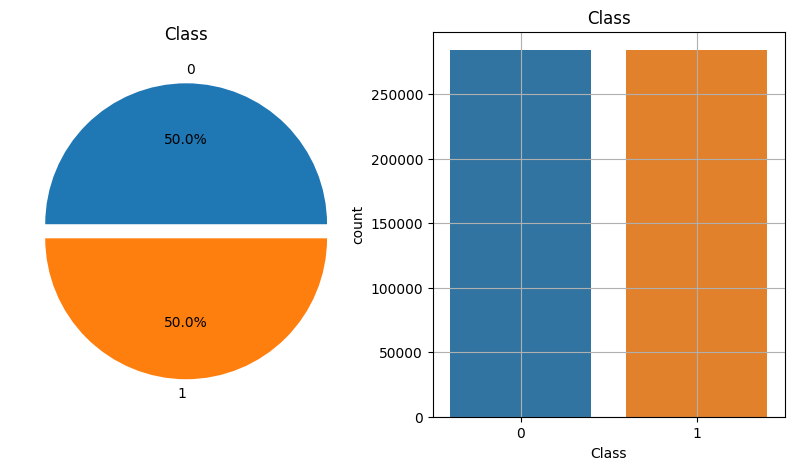

In [29]:
f, ax = plt.subplots(1,2,figsize=(10,5))

y_resampled.value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Class')
ax[0].set_ylabel('')

sns.countplot(x = y_resampled, ax = ax[1])
ax[1].set_title('Class')

N,P = y_resampled.value_counts()
print('Legit transactions (0): ', N)
print('Fraudolent transactions (1): ', P)

plt.grid()
plt.show()

After applying SMOTE, the dataset is perfectly balanced.

## Dataset preprocessing

In [30]:
#split the dataset intro train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 7)

In [32]:
print(X_train.shape)
print(y_train.shape)

(454904, 30)
(454904,)


In [33]:
print(X_test.shape)
print(y_test.shape)

(113726, 30)
(113726,)


# Classification algorithm

In [34]:
lr = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [43]:
lr_pred_test = lr.predict(X_test)

## Model evaluation

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [41]:
lr_pred_train = lr.predict(X_train)

In [44]:
#Train score and Test score of Logistic Regression
print("Train accuracy: ", accuracy_score(y_train,lr_pred_train)*100)
print("Test accuracy: ", accuracy_score(y_test, lr_pred_test)*100)

Train accuracy:  97.1596204913564
Test accuracy:  97.17215060760073


In [48]:
cm_lr = confusion_matrix(y_test, lr_pred_test)
TN, FP, FN, TP = cm_lr[0,0], cm_lr[0,1], cm_lr[1,0], cm_lr[1,1]

<Axes: >

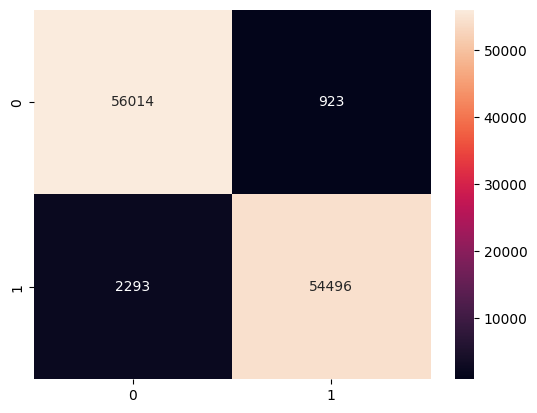

In [49]:
sns.heatmap(cm_lr, annot = True, fmt = 'd')

In [50]:
print("Precision score: ", precision_score(y_test, lr_pred_test)*100)
print("Recall: ", recall_score(y_test, lr_pred_test)*100)
print("F1-score: ", f1_score(y_test, lr_pred_test)*100)

Precision score:  98.33450621627962
Recall:  95.96224620965327
F1-score:  97.13389419649224


In [51]:
print("Classification Report :\n", classification_report(y_test, lr_pred_test, digits=4))

Classification Report :
               precision    recall  f1-score   support

           0     0.9607    0.9838    0.9721     56937
           1     0.9833    0.9596    0.9713     56789

    accuracy                         0.9717    113726
   macro avg     0.9720    0.9717    0.9717    113726
weighted avg     0.9720    0.9717    0.9717    113726



In [52]:
auc = roc_auc_score(y_test, lr_pred_test)

print("ROC AUC score: ", auc)

ROC AUC score:  0.9717057811650622


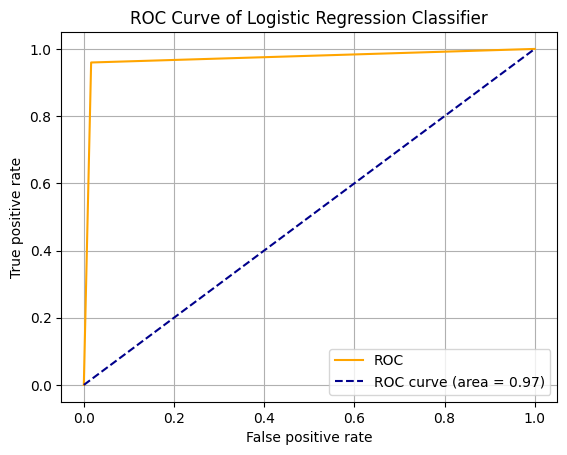

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, lr_pred_test)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle="--", label="ROC curve (area = %0.2f)" % auc)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve of Logistic Regression Classifier")
plt.legend()
plt.grid()
plt.show()

# Conclusions

The logistic regression model achieved high precision and recall scores of 98.33% and 95.96%, respectively. The F1-score, which is a measure of the balance between precision and recall, was also high at 97.13%. The ROC AUC score, which measures the model's ability to distinguish between positive and negative classes, was 0.97. Overall, these results suggest that the model is performing well in identifying fraud cases while minimizing false positives and false negatives. 